<a href="https://colab.research.google.com/github/ibonetc/IA_Pregrado_-2025/blob/main/ML_Normalizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Escalado y normalización de Rasgos

- El escalado transforma los rasgos a un mismo intervalo. Haciendo que no haya diferencia de rangos entre ellos, lo cual puede facilitar el uso de algorimos de machine learning

### Técnicas de escalado de rasgos
- **Normalization** y **MinMaxScaler**: Normalization convierte los valos entre 0 y 1 y MinMaxScaler entre cualquier rango
```Python
(values - values.min())/(values.max() - values.min())
```
- **Estardarización** (**StandardScaler**)
    - Mean: 0, StdDev: 1
```Python
(values - values.mean())/values.std()
```
    - Menos sensible a outliers

### Algoritmos de Machine Learning
- Algunos algoritmos son más sensibles que otros, como las redes neuronales porque permite que converjan más rápido.

- Los algoritmos basados en distancia tienen más efecto por el rango de los rasgos. Ejemplo: KNN, SVM

### Ejemplo
- Datos: `data_weather.csv`
- Predecir si va a llover mañana

In [1]:
import pandas as pd

In [46]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/dataweather.csv', index_col=0)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
row ID,,,,,,,,,,,,,,,,,,,,,
Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99516 entries, Row0 to Row101820
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       99516 non-null  object 
 1   MinTemp        99073 non-null  float64
 2   MaxTemp        99286 non-null  float64
 3   Rainfall       98537 non-null  float64
 4   Evaporation    56985 non-null  float64
 5   Sunshine       52199 non-null  float64
 6   WindGustDir    92995 non-null  object 
 7   WindGustSpeed  93036 non-null  float64
 8   WindDir9am     92510 non-null  object 
 9   WindDir3pm     96868 non-null  object 
 10  WindSpeed9am   98581 non-null  float64
 11  WindSpeed3pm   97681 non-null  float64
 12  Humidity9am    98283 non-null  float64
 13  Humidity3pm    97010 non-null  float64
 14  Pressure9am    89768 non-null  float64
 15  Pressure3pm    89780 non-null  float64
 16  Cloud9am       61944 non-null  float64
 17  Cloud3pm       59514 non-null  float64
 18  Temp

In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,99516.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,0.224677
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,0.417372
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,0.000000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


### Simplificación
- Nos enfocaremos en valores numéricos
- Eliminaremos vacíos

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

In [14]:
len(data)

99516

Seleccionar los rasgos numéricos

In [17]:
data_clean = data.select_dtypes(include='number')
len(data_clean)

99516

In [21]:
data_clean['RainTomorrow']=data['RainTomorrow']
data_clean = data_clean.dropna()
len(data_clean)

40748

In [37]:
X = data_clean.select_dtypes(include='number')
y = data_clean['RainTomorrow']

In [39]:
y.value_counts()

,count
RainTomorrow,
0,31735
1,9013


Dividir en entrenamiento y prueba

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

pd.DataFrame(X_train).describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000
mean,13.320152,24.122814,2.159310,5.451825,7.686033,40.581907,15.273882,19.601233,66.180256,49.593135,1017.371572,1014.918851,4.253328,4.338518,18.068050,22.623115,0.220934
std,6.442711,6.984857,7.018438,3.718529,3.770609,13.373171,8.569466,8.584078,18.706499,20.220605,6.948172,6.911780,2.806093,2.649693,6.586732,6.839458,0.414882
min,-6.700000,7.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,1.000000,0.000000,982.900000,978.200000,0.000000,0.000000,-0.900000,4.300000,0.000000
25%,8.400000,18.600000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.800000,1010.100000,1.000000,2.000000,12.900000,17.300000,0.000000
50%,13.000000,23.800000,0.000000,4.800000,8.600000,39.000000,15.000000,19.000000,67.000000,51.000000,1017.300000,1014.800000,5.000000,5.000000,17.600000,22.300000,0.000000
75%,18.300000,29.600000,0.600000,7.400000,10.700000,48.000000,20.000000,24.000000,80.000000,63.000000,1022.000000,1019.600000,7.000000,7.000000,23.100000,27.800000,0.000000
max,31.400000,48.100000,182.600000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.200000,1037.300000,8.000000,9.000000,39.000000,46.100000,1.000000


<Axes: xlabel='Rainfall', ylabel='WindSpeed9am'>

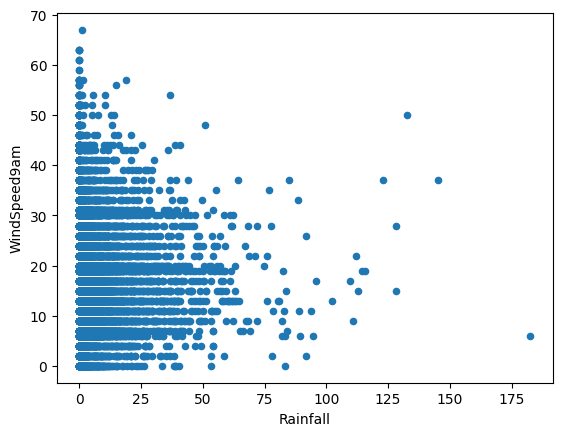

In [41]:
X_train.plot.scatter(x='Rainfall', y='WindSpeed9am')

### Box plots
- Q1: 25%, Q2: 50%, Q3: 75%

<Axes: >

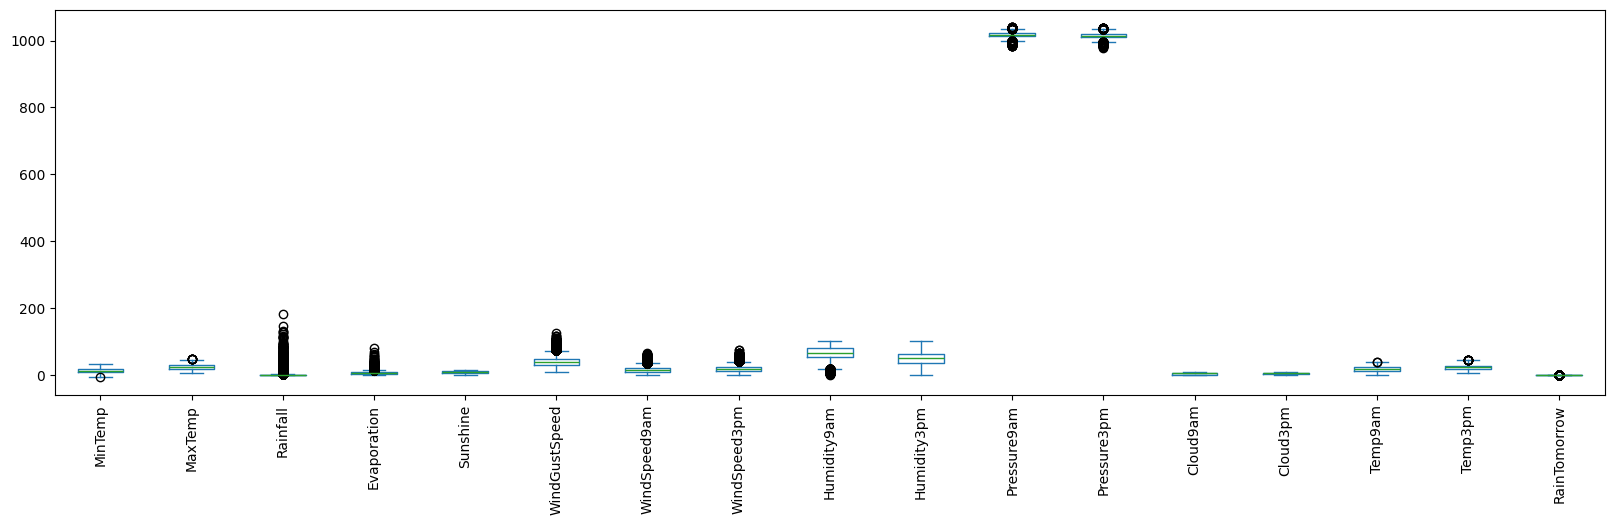

In [42]:
X_train.plot.box(figsize=(20,5), rot=90)

### Normalización
- MinMaxScaler: transforma los rasgos a una escala dada.

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [28]:
pd.DataFrame(X_train_norm).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000,32598.000000
mean,0.525463,0.416613,0.011825,0.067141,0.530071,0.274625,0.227968,0.257911,0.658386,0.495931,0.601598,0.621300,0.531666,0.482058,0.475390,0.438352,0.220934
std,0.169100,0.169948,0.038436,0.045795,0.260042,0.116288,0.127902,0.112948,0.188955,0.202206,0.121260,0.116951,0.350762,0.294410,0.165081,0.163623,0.414882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.396325,0.282238,0.000000,0.034483,0.344828,0.191304,0.134328,0.171053,0.545455,0.350000,0.521815,0.539763,0.125000,0.222222,0.345865,0.311005,0.000000
50%,0.517060,0.408759,0.000000,0.059113,0.593103,0.260870,0.223881,0.250000,0.666667,0.510000,0.600349,0.619289,0.625000,0.555556,0.463659,0.430622,0.000000
75%,0.656168,0.549878,0.003286,0.091133,0.737931,0.339130,0.298507,0.315789,0.797980,0.630000,0.682373,0.700508,0.875000,0.777778,0.601504,0.562201,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='2', ylabel='6'>

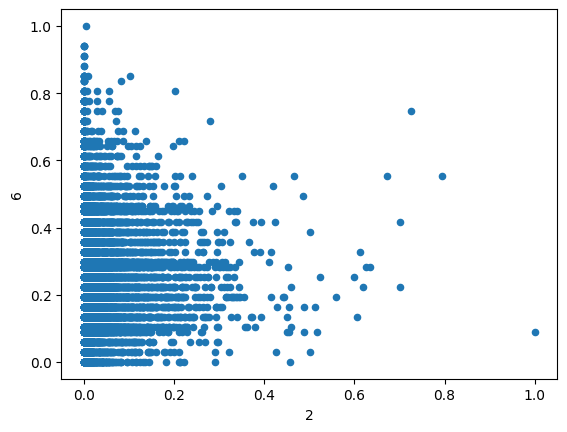

In [29]:
pd.DataFrame(X_train_norm).plot.scatter(x=2, y=6)

<Axes: >

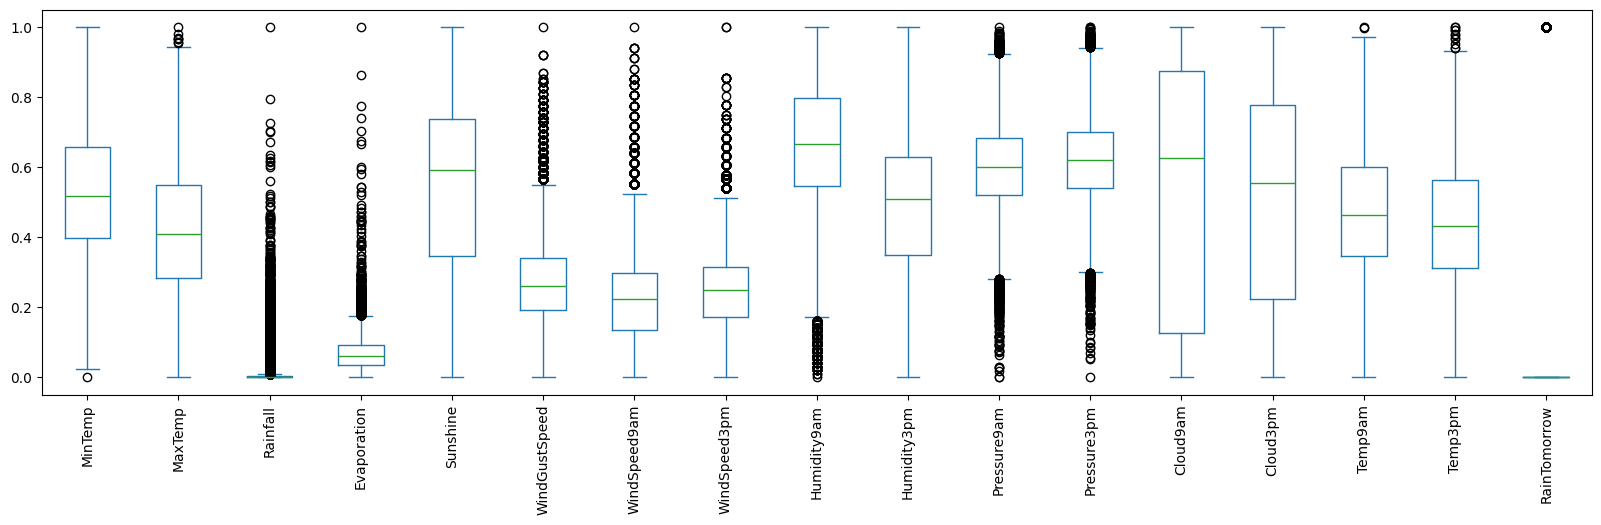

In [30]:
pd.DataFrame(X_train_norm, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)

### Estandarización
- StandardScaler: Estandariza los rasgos a media 0 y una uidad de varaianza.

In [31]:
from sklearn.preprocessing import StandardScaler

In [44]:
scale = StandardScaler().fit(X_train)

X_train_stand = scale.transform(X_train)
X_test_stand = scale.transform(X_test)

In [33]:
pd.DataFrame(X_train_stand).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,32598.00,32598.00,32598.00,32598.00,32598.00,32598.00,32598.00,32598.00,32598.00,32598.00,32598.00,32598.00,32598.00,32598.00,32598.00,32598.00,32598.00
mean,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.11,-2.45,-0.31,-1.47,-2.04,-2.36,-1.78,-2.28,-3.48,-2.45,-4.96,-5.31,-1.52,-1.64,-2.88,-2.68,-0.53
25%,-0.76,-0.79,-0.31,-0.71,-0.71,-0.72,-0.73,-0.77,-0.60,-0.72,-0.66,-0.70,-1.16,-0.88,-0.78,-0.78,-0.53
50%,-0.05,-0.05,-0.31,-0.18,0.24,-0.12,-0.03,-0.07,0.04,0.07,-0.01,-0.02,0.27,0.25,-0.07,-0.05,-0.53
75%,0.77,0.78,-0.22,0.52,0.80,0.55,0.55,0.51,0.74,0.66,0.67,0.68,0.98,1.00,0.76,0.76,-0.53
max,2.81,3.43,25.71,20.37,1.81,6.24,6.04,6.57,1.81,2.49,3.29,3.24,1.34,1.76,3.18,3.43,1.88


<Axes: xlabel='2', ylabel='6'>

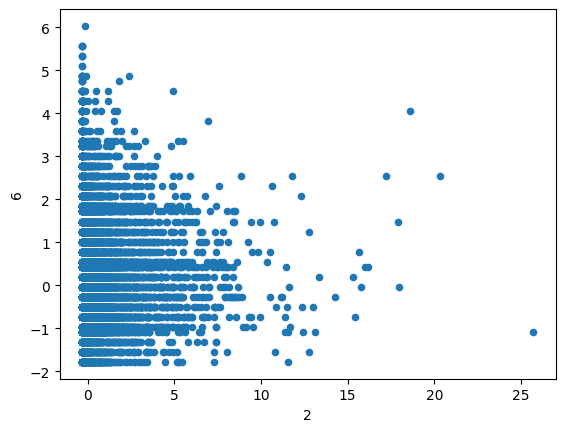

In [34]:
pd.DataFrame(X_train_stand).plot.scatter(x=2, y=6)

<Axes: >

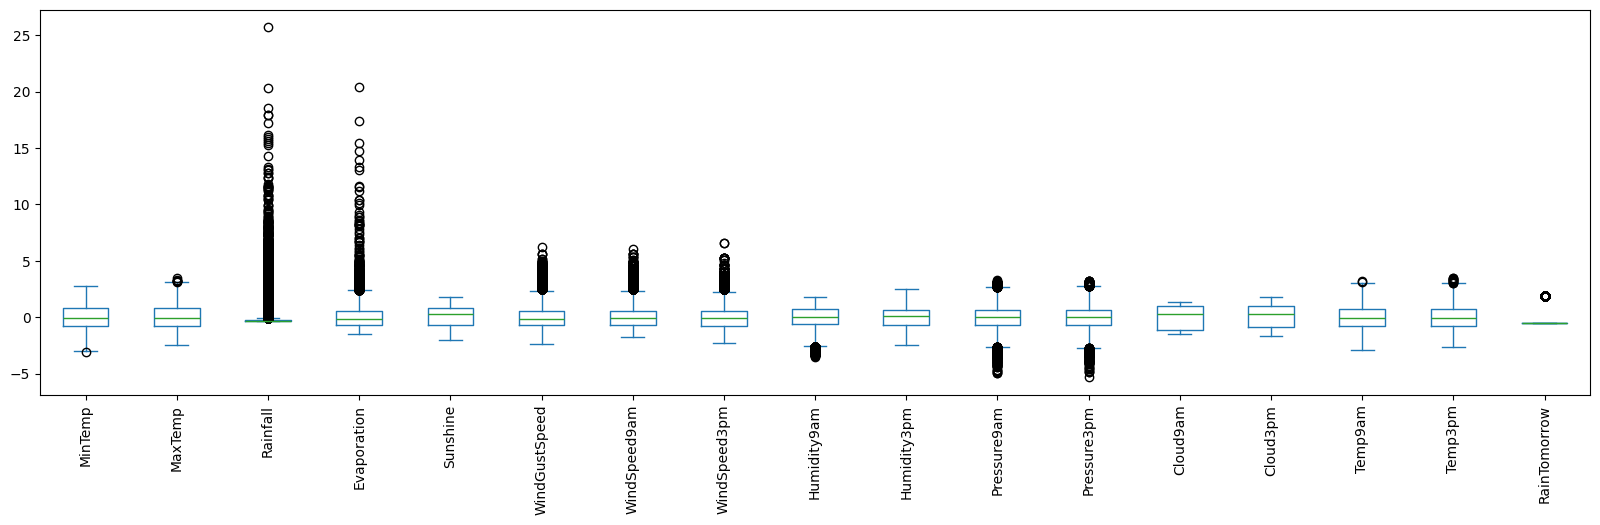

In [35]:
pd.DataFrame(X_train_stand, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)

### Utilizando SVM para probar la normalización y estarización

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


score = []

trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

for train, test in zip(trainX, testX):
    svc = SVC()

    svc.fit(train, y_train)
    y_pred = svc.predict(test)

    score.append(accuracy_score(y_test, y_pred))

df_svr = pd.DataFrame({'Accuracy': score}, index=['Original', 'Normalizado', 'Estandarizado'])
df_svr

,Accuracy
Original,0.833865
Normalizado,1.000000
Estandarizado,0.999755
